In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,chi2_contingency, f_oneway
import seaborn as sns

In [2]:
bike_data = pd.read_excel('Bike_Sales.xlsx')
bike_data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080


In [4]:
bike_data.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object

### Continuous

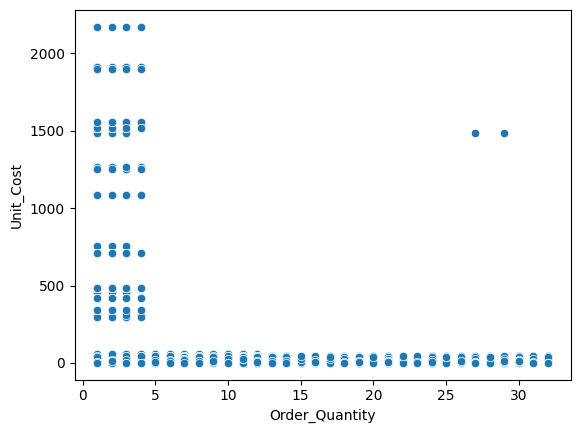

In [5]:
# Scatter plot
sns.scatterplot(x="Order_Quantity", y="Unit_Cost", data=bike_data)
plt.show()

In [6]:
# Pearson correlation
pearson_corr, p_value = pearsonr(bike_data["Order_Quantity"], bike_data["Unit_Cost"])
print("Pearson Correlation:", pearson_corr, "p-value:", p_value)

Pearson Correlation: -0.5158349831003335 p-value: 0.0


There is a negative correlation between the variables thus weak correlation

### categorical

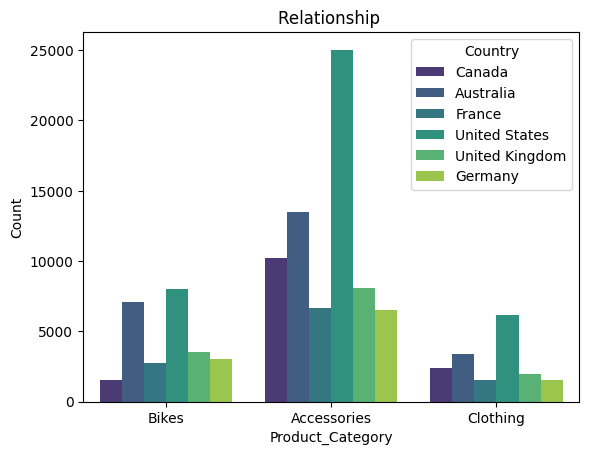

In [ ]:
# bar chart
sns.countplot(bike_data, x="Product_Category", hue="Country", palette="viridis")

plt.title("Relationship ")
plt.ylabel("Count")
plt.show()

In [ ]:
# --- Chi-square Test ---
ct = pd.crosstab(bike_data["Product_Category"], bike_data["Country"])
chi2, p = chi2_contingency(ct)
print("p-value:", p)
print("Chi-square statistic:", chi2)

p-value: 0.0
Chi-square statistic: 2113.5363828387603


Since the p value is less than 0.05,
There is a highly significant association between the two categorical variables

### continuous and categorial

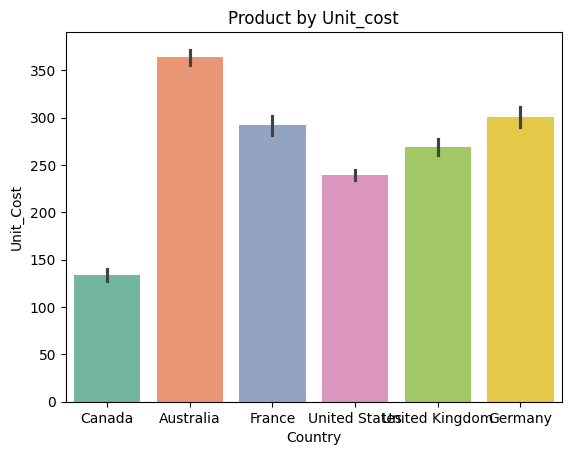

In [ ]:
# --- barplot ---
sns.barplot(data=bike_data, x="Country", y="Unit_Cost", palette="Set2", hue="Country",legend=False)
plt.title("Product by Unit_cost")
plt.show()

In [ ]:
# one-way ANOVA
group = [bike_data[bike_data["Country"]==country]["Unit_Cost"] for country in bike_data["Country"].unique()]
f_stat, p_val = f_oneway(*group)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)


ANOVA F-statistic: 354.3980320348222
p-value: 0.0


There is a highly significant difference in Unit_Cost across countries, thus
a one-way ANOVA showed a significant effect of Country on Unit_Cost